練習のための準備
練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。こうすることで2次元の散布図を描き確認することができます。また、問題を単純化するためアヤメの種類を2つだけ使うことにします。分類対象が2種類の場合を 2値分類 と呼び、それ以上の 多値分類 とは区別をします。それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。

##【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。

・virgicolorとvirginica

・sepal_lengthとpetal_length

《実際の問題では？》


実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [225]:

import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
%matplotlib inline

In [226]:
data = load_iris()

In [227]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [228]:
x = pd.DataFrame(data = data.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
X = x[["sepal_length","petal_length"]]
y = pd.DataFrame(data = data.target, columns=["Species"])

df = pd.concat([X,y], axis=1)

df = df.query("Species==[1, 2]")

In [229]:
#1がversicolor、2がvirginica
df["Species"].value_counts()

2    50
1    50
Name: Species, dtype: int64

In [230]:
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


##【問題2】データの分析

まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。


ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。


《実際の問題では？》


このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。


今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。


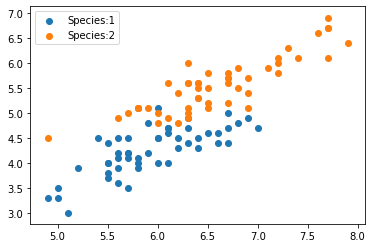

In [231]:
#散布図
plt.scatter(df.query("Species ==1")['sepal_length'],
            df.query("Species ==1")['petal_length'],label="Species:1")
plt.scatter(df.query("Species ==2")['sepal_length'],
            df.query("Species ==2")['petal_length'],label="Species:2")

plt.legend()

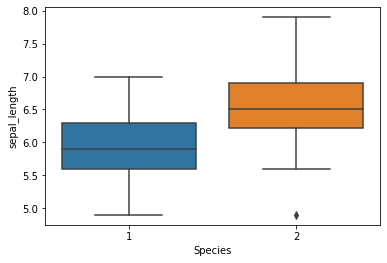

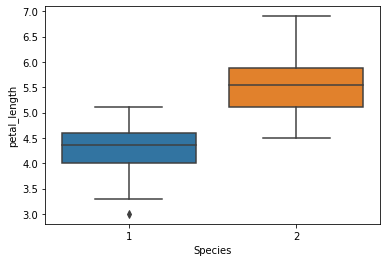

In [232]:
#箱ひげ
fig, ax1 = plt.subplots(1, 1)
fig, ax2 = plt.subplots(1, 1)


#x=ラベル　y=特徴量
sns.boxplot(x="Species", y="sepal_length",data=df,ax=ax1)
sns.boxplot(x="Species", y="petal_length",data=df,ax=ax2)


plt.show()

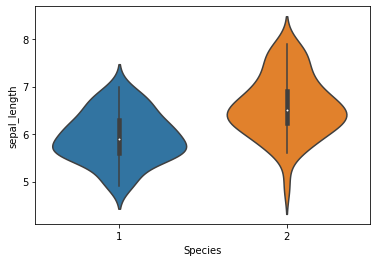

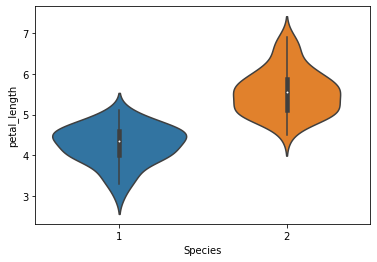

In [233]:
fig, ax1 = plt.subplots(1, 1)
fig, ax2 = plt.subplots(1, 1)


sns.violinplot(x="Species", y="sepal_length",data=df,ax=ax1)
sns.violinplot(x="Species", y="petal_length",data=df,ax=ax2)


plt.show()

##【問題3】前処理・訓練データと検証データの分割


前処理の一貫として、訓練データと検証データの分割を行います。今回は訓練データ75%、検証データ25%として分割してください。


scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。


sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


《注意点》


データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。


《分割する理由》


分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練データ、検証に使うデータが検証データで、一般的に7対3から8対2程度の割合にします。

In [259]:
X = np.array(df[['sepal_length', 'petal_length']])
y = np.array(df['Species'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)


In [260]:
X_train

array([[6.3, 4.9],
       [6.1, 4.7],
       [6.7, 5.6],
       [6.3, 5.6],
       [5.9, 4.8],
       [5.8, 3.9],
       [6.3, 4.7],
       [5.5, 4. ],
       [6. , 4. ],
       [5.8, 5.1],
       [6.1, 5.6],
       [6.3, 4.9],
       [5.8, 5.1],
       [6.5, 5.8],
       [7.7, 6.9],
       [7.2, 6. ],
       [6.7, 5.7],
       [7.3, 6.3],
       [5.8, 4. ],
       [6.2, 4.8],
       [5.9, 5.1],
       [5.8, 4.1],
       [6.8, 5.9],
       [5.7, 5. ],
       [7. , 4.7],
       [6.2, 4.5],
       [5.6, 4.2],
       [5.6, 4.1],
       [5.7, 4.2],
       [5.5, 4. ],
       [6.9, 5.7],
       [6.7, 5.7],
       [5.5, 3.8],
       [5.6, 4.9],
       [5.7, 4.2],
       [4.9, 4.5],
       [7.4, 6.1],
       [6.9, 5.1],
       [6. , 4.8],
       [5.6, 3.9],
       [7.9, 6.4],
       [7.6, 6.6],
       [6.9, 5.4],
       [6.4, 5.3],
       [6.4, 5.3],
       [6.2, 4.3],
       [5.7, 4.1],
       [4.9, 3.3],
       [6.5, 5.2],
       [7.2, 6.1],
       [6.7, 5.2],
       [6.1, 4.7],
       [6.4,

##【問題4】前処理・標準化

分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。


標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。


sklearn.model_selection.train_test_split — scikit-learn 0.21.3 documentation


《注意点》


標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。


《実際の問題での前処理は？》


アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [236]:
#標準化
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [237]:
X_train_scaled 

array([[ 0.0488462 , -0.02540502],
       [-0.24423101, -0.26357708],
       [ 0.63500064,  0.80819719],
       [ 0.0488462 ,  0.80819719],
       [-0.53730823, -0.14449105],
       [-0.68384684, -1.21626532],
       [ 0.0488462 , -0.26357708],
       [-1.12346266, -1.09717929],
       [-0.39076962, -1.09717929],
       [-0.68384684,  0.21276704],
       [-0.24423101,  0.80819719],
       [ 0.0488462 , -0.02540502],
       [-0.68384684,  0.21276704],
       [ 0.34192342,  1.04636925],
       [ 2.10038672,  2.35631559],
       [ 1.36769368,  1.28454131],
       [ 0.63500064,  0.92728322],
       [ 1.51423228,  1.64179941],
       [-0.68384684, -1.09717929],
       [-0.09769241, -0.14449105],
       [-0.53730823,  0.21276704],
       [-0.68384684, -0.97809326],
       [ 0.78153924,  1.16545528],
       [-0.83038545,  0.09368101],
       [ 1.07461646, -0.26357708],
       [-0.09769241, -0.50174914],
       [-0.97692405, -0.85900723],
       [-0.97692405, -0.97809326],
       [-0.83038545,

In [238]:
X_test_scaled

array([[ 0.0488462 , -0.62083517],
       [ 0.78153924,  0.68911116],
       [ 0.78153924, -0.14449105],
       [-0.24423101, -0.38266311],
       [-0.39076962, -0.50174914],
       [ 0.48846203, -0.62083517],
       [ 0.63500064, -0.26357708],
       [-0.39076962,  0.21276704],
       [-0.24423101, -0.02540502],
       [-0.24423101, -1.09717929],
       [ 2.10038672,  1.40362735],
       [ 0.0488462 ,  1.28454131],
       [-0.68384684,  0.21276704],
       [-0.39076962,  0.09368101],
       [ 0.0488462 ,  0.09368101],
       [ 0.19538481,  0.80819719],
       [ 2.10038672,  2.11814353],
       [-0.83038545, -0.50174914],
       [-1.12346266, -0.62083517],
       [-0.53730823, -0.85900723],
       [-0.83038545, -1.69260945],
       [ 0.0488462 ,  0.21276704],
       [ 0.19538481,  0.80819719],
       [-1.8561557 , -1.93078151],
       [-0.39076962, -0.50174914]])

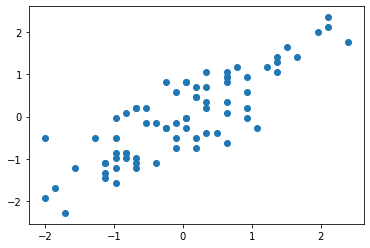

In [239]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])

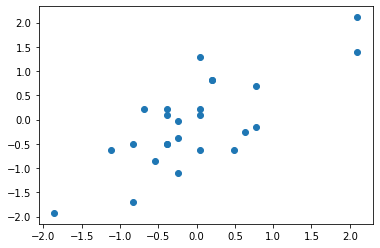

In [240]:
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1])

In [241]:
scaler.mean_

array([6.26666667, 4.92133333])

##【問題5】学習と推定

最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは*訓練データ*です。


sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation


学習が終わった後、検証データをpredictメソッドに入力し、推定を行ってください。


パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [242]:
#3
neigh3 = KNeighborsClassifier(n_neighbors=3)
#公式によるとyを1次元にしないといけないのか？
neigh3.fit(X_train_scaled, y_train.ravel())
y_pred3 = neigh3.predict(X_test_scaled)
y_pred3

array([1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 1])

In [243]:
#1
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_train_scaled, y_train.ravel())
y_pred1 = neigh1.predict(X_test_scaled)
y_pred1

array([1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 1])

In [244]:
#5
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(X_train_scaled, y_train.ravel())
y_pred5 = neigh5.predict(X_test_scaled)
y_pred5

array([1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 1])

In [245]:
#7
neigh7 = KNeighborsClassifier(n_neighbors=7)
#公式によるとyを1次元にしないといけないのか？
neigh7.fit(X_train_scaled, y_train.ravel())
y_pred7 = neigh7.predict(X_test_scaled)
y_pred7

array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2,
       2, 1, 1])

##【問題6】評価

検証データの特徴量を入力して得られた推定値と、検証データの正解値の近さを計算し、学習したモデルを評価します。


2値分類を評価するための指標値には Accuracy（正解率）、Precision（適合率）、Recall（再現率）、F値 があります。それぞれの意味を理解するには、 混同行列（confusion matrix） を見ることになります。


・scikit-learnを使い4種類の指標を計算する
・混同行列をscikit-learnを使い表示する
・4種類の指標値の意味について簡単に調査して文章でまとめる

sklearn.metrics.accuracy_score — scikit-learn 0.21.3 documentation


sklearn.metrics.precision_score — scikit-learn 0.21.3 documentation


sklearn.metrics.recall_score — scikit-learn 0.21.3 documentation


sklearn.metrics.f1_score — scikit-learn 0.21.3 documentation


sklearn.metrics.confusion_matrix — scikit-learn 0.21.3 documentation

In [246]:
#正解率
print(accuracy_score(y_test, y_pred3))
print(accuracy_score(y_test, y_pred1))
print(accuracy_score(y_test, y_pred5))
print(accuracy_score(y_test, y_pred7))

0.96
0.96
0.96
0.92


In [247]:

# 適合率
print(precision_score(y_test ,y_pred3))
print(precision_score(y_test ,y_pred1))
print(precision_score(y_test ,y_pred5))
print(precision_score(y_test ,y_pred7))

1.0
1.0
1.0
0.9285714285714286


In [248]:
#再現率
print(recall_score(y_test, y_pred3))
print(recall_score(y_test, y_pred1))
print(recall_score(y_test, y_pred5))
print(recall_score(y_test, y_pred7))

0.9285714285714286
0.9285714285714286
0.9285714285714286
0.9285714285714286


In [249]:
#F値
print(f1_score(y_test, y_pred3))
print(f1_score(y_test, y_pred1))
print(f1_score(y_test, y_pred5))
print(f1_score(y_test, y_pred7))

0.962962962962963
0.962962962962963
0.962962962962963
0.9285714285714286


In [250]:
#混同行列
print("3-nn")
print(confusion_matrix(y_test ,y_pred3))
print("1-nn")
print(confusion_matrix(y_test ,y_pred1))
print("5-nn")
print(confusion_matrix(y_test ,y_pred5))
print("7-nn")
print(confusion_matrix(y_test ,y_pred7))

3-nn
[[13  1]
 [ 0 11]]
1-nn
[[13  1]
 [ 0 11]]
5-nn
[[13  1]
 [ 0 11]]
7-nn
[[13  1]
 [ 1 10]]


4種類の指標値の意味について簡単に調査して文章でまとめる

・正答率
正答率（Accuracy）は予測結果のうち正解であったデータの割合です。分類モデルの性能を直観的に理解しやすいというメリットがあります。

${\frac{TP + TN}{TP + FP + FN + TN} 
}$


・適合率
正と予測したデータのうち，実際に正であるものの割合。「精度」と呼ぶこともあり。

${\frac{TP}{TP + FP} 
}$


・再現率
実際に正であるもののうち，正であると予測されたものの割合

${\frac{TP}{TP + FN} 
}$


・F値
適合率、再現率の調和平均によって求められる

${\frac{2 \times Precision \times Recall}{Precision + Recall} 
}$


参考https://f-bun.hatenablog.com/entry/2019-02-09

##【問題7】可視化

評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練データまたは検証データを与えます。

In [251]:

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

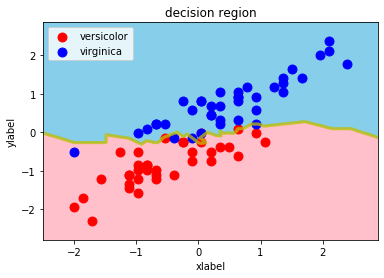

In [252]:
decision_region(X_train_scaled,y_train.ravel(),neigh3)

##【問題8】他の手法の学習

以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。


・最近傍法

・ロジスティック回帰

・SVM

・決定木

・ランダムフォレスト

公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。


sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.21.3 documentation
sklearn.linear_model.LogisticRegression — scikit-learn 0.21.3 documentation
sklearn.svm.SVC — scikit-learn 0.21.3 documentation
sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation
sklearn.ensemble.RandomForestClassifier — scikit-learn 0.21.3 documentation

《実際の問題では？》


ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。

In [253]:
#関数定義
def test_train(X_train, X_test, y_train, y_test,model):
    #yを1次元に
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    print("正解率:{}".format(accuracy_score(y_test ,y_pred)))
    print("適合率:{}".format(precision_score(y_test ,y_pred)))
    print("再現率:{}".format(recall_score(y_test ,y_pred)))
    print("F値:{}".format(f1_score(y_test ,y_pred)))
    print("混同行列",confusion_matrix(y_test ,y_pred))
    decision_region(X_train, y_train.ravel(), model)

正解率:0.96
適合率:1.0
再現率:0.9285714285714286
F値:0.962962962962963
混同行列 [[13  1]
 [ 0 11]]


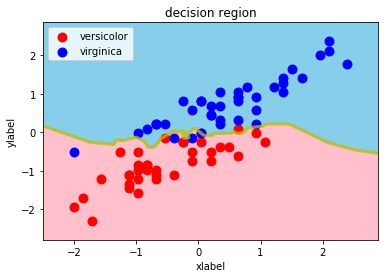

In [254]:
#最近傍法
kneigh = KNeighborsClassifier()

test_train(X_train_scaled, X_test_scaled, y_train, y_test, kneigh)

正解率:0.96
適合率:1.0
再現率:0.9285714285714286
F値:0.962962962962963
混同行列 [[13  1]
 [ 0 11]]


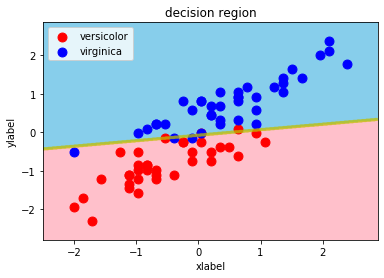

In [255]:
#ロジスティック回帰
clf = LogisticRegression()

test_train(X_train_scaled, X_test_scaled, y_train, y_test, clf)

正解率:0.96
適合率:1.0
再現率:0.9285714285714286
F値:0.962962962962963
混同行列 [[13  1]
 [ 0 11]]


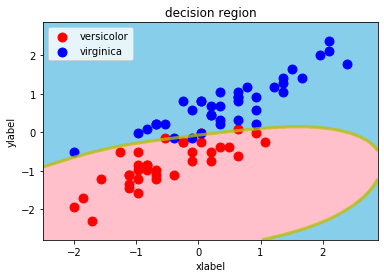

In [256]:
#SVM
svm = SVC()

test_train(X_train_scaled, X_test_scaled, y_train, y_test, svm)

正解率:0.84
適合率:0.8125
再現率:0.9285714285714286
F値:0.8666666666666666
混同行列 [[13  1]
 [ 3  8]]


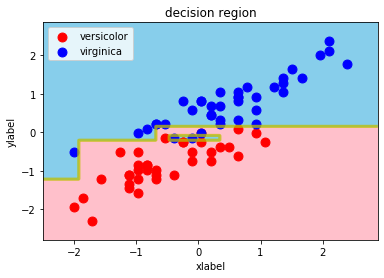

In [257]:
#決定木
dec = DecisionTreeClassifier()

test_train(X_train_scaled, X_test_scaled, y_train, y_test, dec)

正解率:0.92
適合率:0.9285714285714286
再現率:0.9285714285714286
F値:0.9285714285714286
混同行列 [[13  1]
 [ 1 10]]


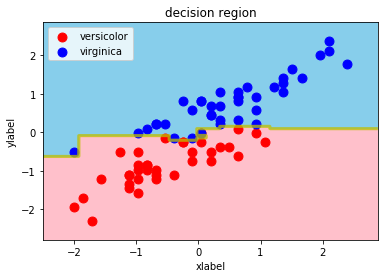

In [258]:
#ランダムフォレスト
rand = RandomForestClassifier()

test_train(X_train_scaled, X_test_scaled, y_train, y_test, rand)

考察


1.最近傍法

|  正解率 | 適合率 | 再現率 | F値 |
| ---- | ---- | ---- | ---- |
|  0.96  |  1.0      |  0.9285714285714286      | 0.962962962962963    |


2. ロジスティック回帰

|  正解率 | 適合率 | 再現率 | F値 |
| ---- | ---- | ---- | ---- |
|  0.96  |  1.0      |  0.9285714285714286      | 0.962962962962963    |

3. SVM

|  正解率 | 適合率 | 再現率 | F値 |
| ---- | ---- | ---- | ---- |
|  0.96  |  1.0      |  0.9285714285714286     | 0.962962962962963    |

4.決定木

|  正解率 | 適合率 | 再現率 | F値 |
| ---- | ---- | ---- | ---- |
| 0.84  |  0.8125     |  0.9285714285714286     | 0.8666666666666666   |

5.ランダムフォレスト

|  正解率 | 適合率 | 再現率 | F値 |
| ---- | ---- | ---- | ---- |
|  0.92  |  0.9285714285714286     |  0.9285714285714286      | 0.9285714285714286    |



最近傍法,ロジスティック回帰,SVMが最良の結果となった。
全ての手法で再現率が同じであった。
決定木とランダムフォレストは決定領域でジグザグなのでうまく分類できていると思う。

##【問題9】（アドバンス課題）標準化の有無の比較

前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

正解率:0.96
適合率:1.0
再現率:0.9285714285714286
F値:0.962962962962963
混同行列 [[13  1]
 [ 0 11]]


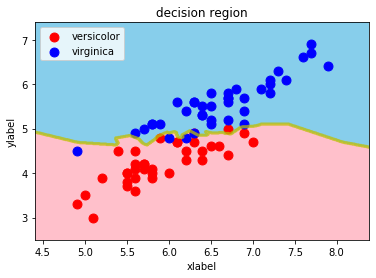

In [261]:
#標準化 Standard Scalerなし(X_train_scaled, X_test_scaled)
#最近傍法

kneigh2 = KNeighborsClassifier()

test_train(X_train, X_test, y_train, y_test, kneigh2)

正解率:0.96
適合率:1.0
再現率:0.9285714285714286
F値:0.962962962962963
混同行列 [[13  1]
 [ 0 11]]


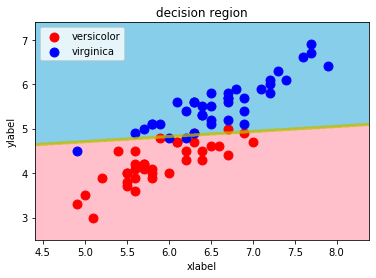

In [262]:
#ロジスティック回帰
clf2 = LogisticRegression()

test_train(X_train, X_test, y_train, y_test, clf2)

正解率:0.96
適合率:1.0
再現率:0.9285714285714286
F値:0.962962962962963
混同行列 [[13  1]
 [ 0 11]]


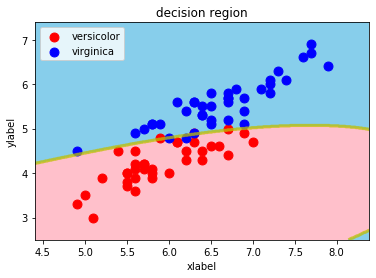

In [263]:
#SVM
svm2 = SVC()

test_train(X_train, X_test, y_train, y_test, svm2)

正解率:0.84
適合率:0.8125
再現率:0.9285714285714286
F値:0.8666666666666666
混同行列 [[13  1]
 [ 3  8]]


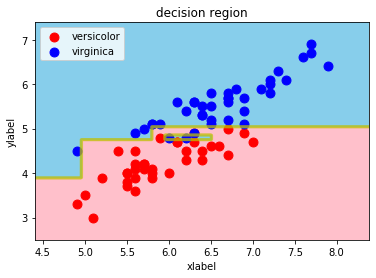

In [264]:
#決定木
dec2 = DecisionTreeClassifier()

test_train(X_train, X_test, y_train, y_test, dec2)

正解率:0.96
適合率:1.0
再現率:0.9285714285714286
F値:0.962962962962963
混同行列 [[13  1]
 [ 0 11]]


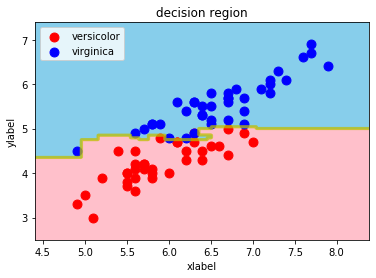

In [265]:
#ランダムフォレスト
rand2 = RandomForestClassifier()

test_train(X_train, X_test, y_train, y_test, rand2)

結果

標準化有無での変化はとくにはみられない。

特徴量の数が大きくないからでは？

##【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法

ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。


《多値になることでの変更点》


指標値Precision（適合率）、Recall（再現率）、F値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。


決定領域を可視化する前述の関数は適切に書き換える必要があります。以下が出力例です。

ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは自動的に判断して処理が行われるため変更は必要ありません

In [279]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', 
                    target_names=['setosa','versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['green','red', 'blue']
    contourf_color = ["springgreen",'pink', 'skyblue']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()
    
    
#関数定義
def test_train(X_train, X_test, y_train, y_test,model):
    #yを1次元に
    model.fit(X_train, y_train.ravel())
    y_pred = model.predict(X_test)
    print("正解率:{}".format(accuracy_score(y_test ,y_pred)))
    #デフォルトで2値分類用なので他の引数を設定
    print("適合率:{}".format(precision_score(y_test ,y_pred, average="micro")))
    print("再現率:{}".format(recall_score(y_test ,y_pred, average="micro")))
    print("F値:{}".format(f1_score(y_test ,y_pred, average="micro")))
    print("混同行列",confusion_matrix(y_test ,y_pred))
    decision_region(X_train, y_train.ravel(), model)
    

In [270]:
#データ
x = pd.DataFrame(data = data.data, columns=["sepal_length","sepal_width","petal_length","petal_width"])
X = x[["sepal_length","petal_length"]]
y = pd.DataFrame(data = data.target, columns=["Species"])

df = pd.concat([X,y], axis=1)

df["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [271]:
X = np.array(df[['sepal_length', 'petal_length']])
y = np.array(df['Species'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [272]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

正解率:0.9473684210526315
適合率:0.9473684210526315
再現率:0.9473684210526315
F値:0.9473684210526315
混同行列 [[14  0  0]
 [ 0  9  1]
 [ 0  1 13]]


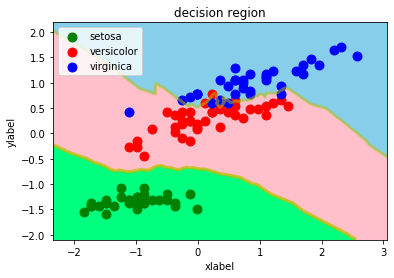

In [280]:
#最近傍法
kneigh3 = KNeighborsClassifier()

test_train(X_train_scaled, X_test_scaled, y_train, y_test, kneigh3)

正解率:0.9473684210526315
適合率:0.9473684210526315
再現率:0.9473684210526315
F値:0.9473684210526315
混同行列 [[14  0  0]
 [ 0  9  1]
 [ 0  1 13]]


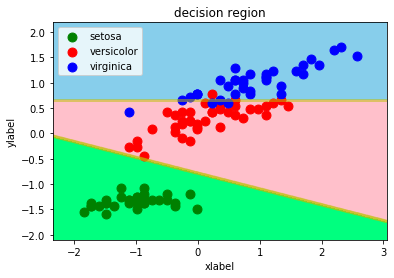

In [281]:
#ロジスティック回帰
clf3 = LogisticRegression()

test_train(X_train_scaled, X_test_scaled, y_train, y_test, clf3)

正解率:0.9473684210526315
適合率:0.9473684210526315
再現率:0.9473684210526315
F値:0.9473684210526315
混同行列 [[14  0  0]
 [ 0 10  0]
 [ 0  2 12]]


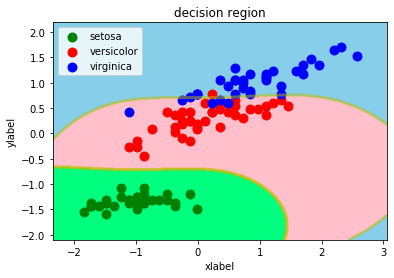

In [282]:
#SVM
svm3 = SVC()

test_train(X_train_scaled, X_test_scaled, y_train, y_test, svm3)


正解率:0.8947368421052632
適合率:0.8947368421052632
再現率:0.8947368421052632
F値:0.8947368421052632
混同行列 [[14  0  0]
 [ 0  9  1]
 [ 0  3 11]]


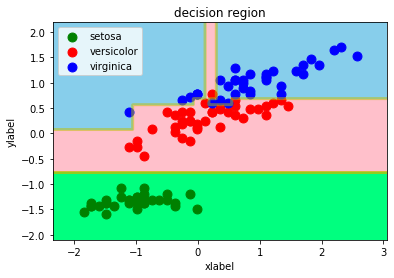

In [283]:

#決定木
dec3 = DecisionTreeClassifier()

test_train(X_train_scaled, X_test_scaled, y_train, y_test, dec3)

正解率:0.9210526315789473
適合率:0.9210526315789473
再現率:0.9210526315789473
F値:0.9210526315789473
混同行列 [[14  0  0]
 [ 0 10  0]
 [ 0  3 11]]


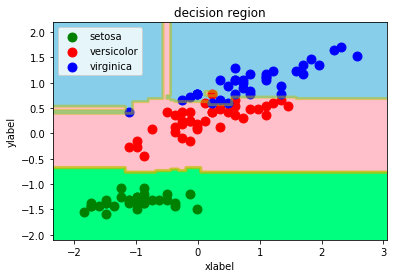

In [284]:
#ランダムフォレスト
rand3 = RandomForestClassifier()

test_train(X_train_scaled, X_test_scaled, y_train, y_test, rand3)

最近傍法,ロジスティック回帰,SVMが最良の結果となった。